# 线性回归实战

In [1]:
#导入工具包
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from ylml.LossFunction import MSE
from ylml.Optim import SGD,MB_SGD
from ylml.ml import Train,LinearRegression_,LinearRegression,LinearRegDataset
from ylml.ylnn import Linear
import numpy as np

## 构造线性回归数据集并展示

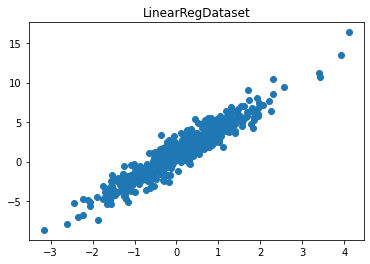

In [2]:
linearRegdataset = LinearRegDataset(500,1,3,1,128)
linearRegdataloader = linearRegdataset.get_dataloader()
linearRegdataset.show_dataset()

## 定义模型损失函数与优化器

In [3]:
#定义设备(CPU，GPU)
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
#定义损失函数MSE(均方差损失)
loss_function = MSE
loss_function_ = nn.MSELoss()
#定义模型
input_num = 1
output_num = 1
model1 = LinearRegression_(input_num,output_num).to(device)
model1_ = LinearRegression_(input_num,output_num).to(device)
model2 = LinearRegression(input_num,output_num)
model2.model.weight.data.normal_(0,1)
model2.model.bias.data.fill_(0)
#定义优化器
optimizer1 = SGD(model1.parameters(),128,0.1)#手动构建的随机梯度下降优化器
optimizer2 = MB_SGD(model1.parameters(),0.0001)#手动构建的小批量随机梯度下降优化器
optimizer3 = torch.optim.SGD(model2.parameters(),0.0001)#torch.optim模块中的SGD
#定义训练器
train = Train(50,loss_function,optimizer1,model1,task_type = 'REG',device = device)
#开始训练
train.start_train(linearRegdataloader)

Start Train!
Train_set Epoch [0/50] loss: 15.5899658203125
Train_set Epoch [1/50] loss: 20.64719581604004
Train_set Epoch [2/50] loss: 18.150732040405273
Train_set Epoch [3/50] loss: 17.680376052856445
Train_set Epoch [4/50] loss: 18.771604537963867
Train_set Epoch [5/50] loss: 16.05745506286621
Train_set Epoch [6/50] loss: 14.681703567504883
Train_set Epoch [7/50] loss: 17.56204605102539
Train_set Epoch [8/50] loss: 11.920889854431152
Train_set Epoch [9/50] loss: 20.12209129333496
Train_set Epoch [10/50] loss: 15.955137252807617
Train_set Epoch [11/50] loss: 14.442914962768555
Train_set Epoch [12/50] loss: 12.484545707702637
Train_set Epoch [13/50] loss: 10.411384582519531
Train_set Epoch [14/50] loss: 14.693604469299316
Train_set Epoch [15/50] loss: 13.796683311462402
Train_set Epoch [16/50] loss: 11.606244087219238
Train_set Epoch [17/50] loss: 14.086971282958984
Train_set Epoch [18/50] loss: 13.339957237243652
Train_set Epoch [19/50] loss: 17.145763397216797
Train_set Epoch [20/50]

## 展示训练过程中损失值变化曲线

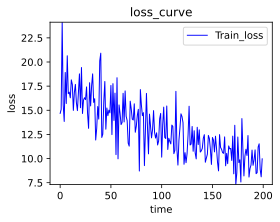

In [4]:
train.show_loss_value()

## 展示线性回归结果

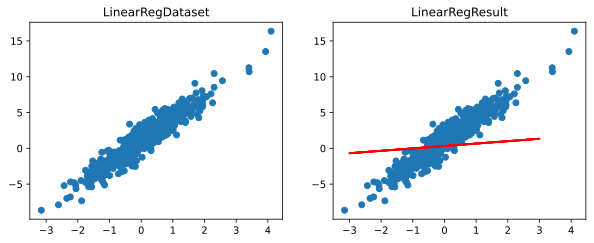

In [5]:
linearRegdataset.show_result(model1.params)

## 导出模型参数的json文件

In [6]:
model1.get_weight_json()

## 指定模型权重参数json文件路径并加载模型权重参数

In [7]:
weight_json_file_path = 'LinearRegression_0.json'
model1_.load_weight_json(weight_json_file_path,device)
print(model1_.params)

[tensor([[0.3367]], device='cuda:0', requires_grad=True), tensor([[0.3278]], device='cuda:0', requires_grad=True)]


In [8]:
#接着之前训练
optimizer1_ = SGD(model1_.parameters(),128,0.1)#手动构建的随机梯度下降优化器
train_ = Train(200,loss_function,optimizer1_,model1_,task_type = 'REG',device = device)
train_.start_train(linearRegdataloader,2)

Start Train!
Train_set Epoch [0/200] loss: 8.947415351867676
Train_set Epoch [1/200] loss: 9.71453857421875
Train_set Epoch [2/200] loss: 7.37408971786499
Train_set Epoch [3/200] loss: 9.225085258483887
Train_set Epoch [4/200] loss: 10.729413986206055
Train_set Epoch [5/200] loss: 9.300244331359863
Train_set Epoch [6/200] loss: 7.87430477142334
Train_set Epoch [7/200] loss: 7.918911933898926
Train_set Epoch [8/200] loss: 10.452718734741211
Train_set Epoch [9/200] loss: 8.15600872039795
Train_set Epoch [10/200] loss: 8.40031909942627
Train_set Epoch [11/200] loss: 8.251945495605469
Train_set Epoch [12/200] loss: 6.9089155197143555
Train_set Epoch [13/200] loss: 7.21282958984375
Train_set Epoch [14/200] loss: 8.417793273925781
Train_set Epoch [15/200] loss: 8.274051666259766
Train_set Epoch [16/200] loss: 8.192767143249512
Train_set Epoch [17/200] loss: 7.048009395599365
Train_set Epoch [18/200] loss: 7.823292255401611
Train_set Epoch [19/200] loss: 8.561601638793945
Train_set Epoch [20/

Train_set Epoch [171/200] loss: 1.843460202217102
Train_set Epoch [172/200] loss: 2.161618947982788
Train_set Epoch [173/200] loss: 1.360281229019165
Train_set Epoch [174/200] loss: 2.1983256340026855
Train_set Epoch [175/200] loss: 2.0246078968048096
Train_set Epoch [176/200] loss: 1.9441776275634766
Train_set Epoch [177/200] loss: 1.8340739011764526
Train_set Epoch [178/200] loss: 2.071474552154541
Train_set Epoch [179/200] loss: 1.9727041721343994
Train_set Epoch [180/200] loss: 1.8831697702407837
Train_set Epoch [181/200] loss: 1.701241374015808
Train_set Epoch [182/200] loss: 2.0942304134368896
Train_set Epoch [183/200] loss: 2.5175015926361084
Train_set Epoch [184/200] loss: 2.037726640701294
Train_set Epoch [185/200] loss: 1.6816256046295166
Train_set Epoch [186/200] loss: 1.737176537513733
Train_set Epoch [187/200] loss: 1.7373850345611572
Train_set Epoch [188/200] loss: 1.5805232524871826
Train_set Epoch [189/200] loss: 1.7175339460372925
Train_set Epoch [190/200] loss: 2.0722

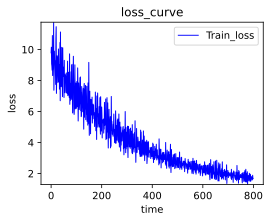

In [9]:
#展示训练过程中损失值变化曲线
train_.show_loss_value()

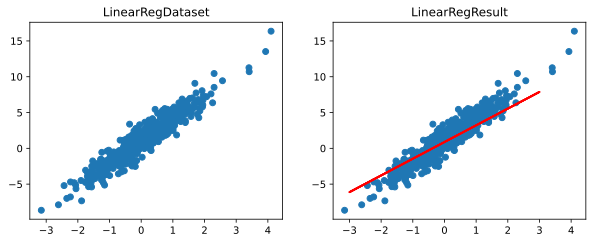

In [10]:
#展示线性回归结果
linearRegdataset.show_result(model1_.params)